<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_UTS_KlasifikasiUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1) a. Pengumpulan dan Pembersihan Data

In [1]:
# 1a. Pengumpulan & Pembersihan Data (Pandas)

import pandas as pd

# Upload manual ke Colab dulu, lalu load file
df = pd.read_csv('/content/KlasifikasiUTS.csv')

# Lihat 5 baris pertama
print("Contoh data awal:")
print(df.head())

# Info ringkasan data: cek null dan tipe data
print("\nInfo ringkasan data:")
print(df.info())

# Cek tipe data semua kolom
print("\nTipe data setiap kolom:")
print(df.dtypes)

# Cek jumlah nilai yang hilang di setiap kolom
print("\nJumlah missing values di setiap kolom:")
print(df.isnull().sum())

# Cek data duplikat
print("\nJumlah data duplikat:")
print(df.duplicated().sum())

# Deskripsi statistik (numerik)
print("\nDeskripsi statistik data numerik:")
print(df.describe())

# Karena tidak ada kolom kategorik:
print("\nTidak ada kolom kategorik di dataset ini.")

# Contoh pembersihan:
# 1. Menghapus baris duplikat
df_cleaned = df.drop_duplicates()

# 2. Menghapus kolom jika semuanya kosong
df_cleaned = df_cleaned.dropna(axis=1, how='all')

# 3. Mengisi missing values (numerik dengan median)
for col in df_cleaned.select_dtypes(include='number').columns:
    median_value = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_value)

# Cek hasil akhir
print("\nJumlah missing values setelah dibersihkan:")
print(df_cleaned.isnull().sum())

print("\nJumlah data duplikat setelah dibersihkan:")
print(df_cleaned.duplicated().sum())

# Simpan versi bersih (opsional)
df_cleaned.to_csv('/content/KlasifikasiUTS_cleaned.csv', index=False)

Contoh data awal:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

##b. Feature Selection

###Constant & Quasi-Constant Feature Removal

In [2]:
from sklearn.feature_selection import VarianceThreshold

# Kita buang kolom dengan variansi sangat rendah (< 0.01)
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_cleaned.drop('Class', axis=1))

low_variance_cols = df_cleaned.drop('Class', axis=1).columns[~selector.get_support()]
print("\nFitur dengan variansi rendah (<0.01):", list(low_variance_cols))


Fitur dengan variansi rendah (<0.01): []


###Duplicate Removal

In [3]:
# Cek kolom duplikat
dup_cols = []
cols = df_cleaned.drop('Class', axis=1).columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if df_cleaned[cols[i]].equals(df_cleaned[cols[j]]):
            dup_cols.append((cols[i], cols[j]))

print("\nFitur duplikat (identik):", dup_cols)


Fitur duplikat (identik): []


###Correlation Matrix


Korelasi fitur dengan target Class:
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


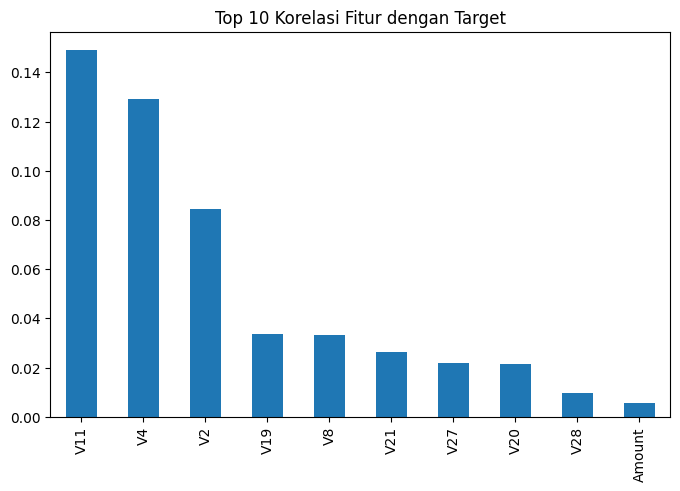


Fitur-fitur dengan korelasi sangat tinggi (>0.9): []


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar fitur
corr_matrix = df_cleaned.drop('Class', axis=1).corr().abs()

# Korelasi fitur dengan target
corr_with_target = df_cleaned.corr()['Class'].drop('Class').sort_values(ascending=False)
print("\nKorelasi fitur dengan target Class:")
print(corr_with_target)

# Plot korelasi fitur dengan target (Top 10)
plt.figure(figsize=(8,5))
corr_with_target.head(10).plot(kind='bar')
plt.title('Top 10 Korelasi Fitur dengan Target')
plt.show()

# Cari fitur-fitur yang saling berkorelasi sangat tinggi (>0.9)
high_corr = []
for col in corr_matrix.columns:
    high_corr.extend([(col, idx) for idx in corr_matrix.index if (corr_matrix.loc[idx, col] > 0.9) and (col != idx)])

print("\nFitur-fitur dengan korelasi sangat tinggi (>0.9):", high_corr)

###Mutual Information


Mutual Information skor fitur dengan target:
V17       0.007873
V14       0.007746
V12       0.007220
V10       0.007150
V11       0.006450
V16       0.005752
V4        0.004587
V3        0.004583
V18       0.003875
V9        0.003854
V7        0.003630
V2        0.002920
V27       0.002166
V21       0.002139
V5        0.002065
V6        0.002000
V1        0.001851
V28       0.001607
V8        0.001600
Amount    0.001446
Time      0.001349
V19       0.001132
V20       0.000904
V23       0.000471
V24       0.000364
V25       0.000253
V26       0.000239
V22       0.000126
V13       0.000085
V15       0.000023
dtype: float64


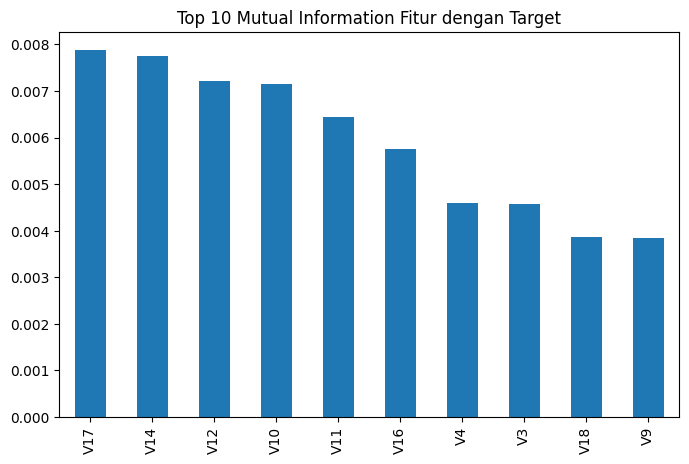

In [5]:
from sklearn.feature_selection import mutual_info_classif

X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

mi_scores = mutual_info_classif(X, y, random_state=0)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("\nMutual Information skor fitur dengan target:")
print(mi_scores_series)

# Plot MI (Top 10)
plt.figure(figsize=(8,5))
mi_scores_series.head(10).plot(kind='bar')
plt.title('Top 10 Mutual Information Fitur dengan Target')
plt.show()

###Chi-Square Test


Chi-Square skor fitur dengan target:
V11       982.889693
V4        921.916976
V14       430.387562
V12       411.886037
V17       285.538949
V16       265.535707
V18       180.104901
V3        158.099000
V10       147.124058
V9         78.570632
Time       65.069253
V7         41.917020
V19        27.791362
V1         22.838648
V6         16.850931
V2         13.987696
V5         12.265108
V8          5.144052
V24         3.989146
V26         0.930864
V15         0.620136
V13         0.617078
Amount      0.294483
V21         0.228533
V22         0.139542
V23         0.121914
V20         0.031032
V27         0.012117
V25         0.003892
V28         0.000047
dtype: float64


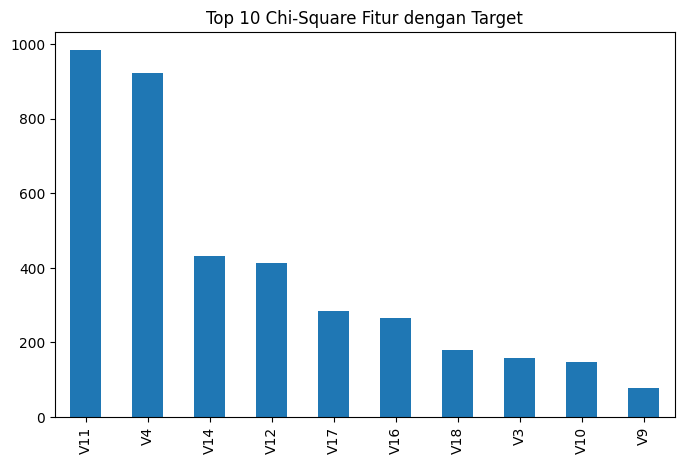

In [6]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import chi2

# Diskritisasi fitur numerik ke 10 bin
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_binned = kbins.fit_transform(X)

chi_scores, p_values = chi2(X_binned, y)
chi_series = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)

print("\nChi-Square skor fitur dengan target:")
print(chi_series)

# Plot Chi2 (Top 10)
plt.figure(figsize=(8,5))
chi_series.head(10).plot(kind='bar')
plt.title('Top 10 Chi-Square Fitur dengan Target')
plt.show()

###ANOVA F-Test


ANOVA F-Score fitur dengan target:
V17       30923.969703
V14       26719.606942
V12       19029.929570
V10       12697.850513
V16       10302.274423
V3         9755.675863
V7         8685.536141
V11        6447.910427
V4         4826.048761
V18        3183.658090
V1         2555.783605
V9         2530.490402
V5         2204.804198
V2         2046.487425
V6          548.236966
V19         321.270696
V8          310.590168
V21         197.244229
V27         136.044078
V20         131.045321
Time         43.346393
V28          26.601443
V24          14.750416
V23          11.380500
Amount        9.469308
V22           6.776920
V26           5.160073
V13           4.308772
V15           3.088960
V25           2.909893
dtype: float64


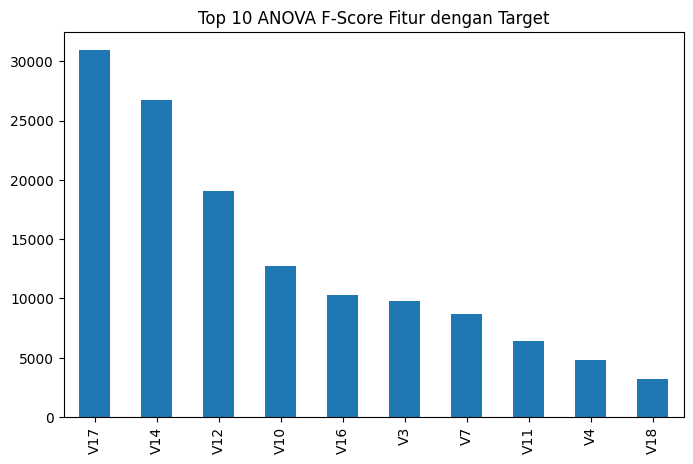

In [7]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)
anova_series = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)

print("\nANOVA F-Score fitur dengan target:")
print(anova_series)

# Plot ANOVA (Top 10)
plt.figure(figsize=(8,5))
anova_series.head(10).plot(kind='bar')
plt.title('Top 10 ANOVA F-Score Fitur dengan Target')
plt.show()

##C) Feature Engineering

###Skala Transformasi Data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned.drop('Class', axis=1))

print("\nContoh hasil scaling (5 data teratas):")
print(pd.DataFrame(X_scaled, columns=df_cleaned.drop('Class', axis=1).columns).head())


Contoh hasil scaling (5 data teratas):
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996823 -0.701082 -0.041687  1.680101  0.976623 -0.247020  0.348012   
1 -1.996823  0.608792  0.164138  0.109279  0.318998  0.042258 -0.060980   
2 -1.996802 -0.700336 -0.811337  1.174270  0.270648 -0.366756  1.352655   
3 -1.996802 -0.499064 -0.109972  1.187383 -0.608355 -0.008814  0.937245   
4 -1.996781 -0.597606  0.535539  1.025470  0.287092 -0.297036  0.072873   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.193700  0.084434  0.333534  ...  0.326273 -0.024777  0.383483 -0.177444   
1 -0.065656  0.072903 -0.231703  ... -0.089963 -0.311372 -0.881454  0.162081   
2  0.643223  0.210788 -1.381169  ...  0.681564  0.343094  1.065068  1.457772   
3  0.192079  0.320843 -1.264664  ... -0.270428 -0.149093  0.007299 -0.305465   
4  0.481517 -0.228725  0.747917  ...  0.530343 -0.012516  1.101780 -0.220709   

        V24       V25       

- Target sudah 0/1 maka tidak perlu label encoding.
- Dataset full numerik maka tidak ada yang perlu di-one-hot

###(Optional) Feature Generation/Polynomial Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

print("\nShape data setelah polynomial (degree=2):", X_poly.shape)


Shape data setelah polynomial (degree=2): (283726, 465)


###(Opsional) PCA / Dimensionality Reduction

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=0)  # Ambil 95% varian
X_pca = pca.fit_transform(X_scaled)

print("\nJumlah fitur setelah PCA:", X_pca.shape[1])


Jumlah fitur setelah PCA: 27


##1. d) Model‑model yang dijalankan dengan scikit-learn

##2. Model Evaluasi (Accuracy, Precision, Recall, F1-Score, AUC-ROC Curve)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Pisahkan X dan y dulu
X = df.drop(columns='Class')
y = df['Class']

# Scaling hanya untuk X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data (X_scaled + y yang asli, bukan yang udah diskalakan)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


🔹 Logistic Regression 🔹
Accuracy : 0.9991222218320986
Precision: 0.8476190476190476
Recall   : 0.6013513513513513
F1-Score : 0.7035573122529645


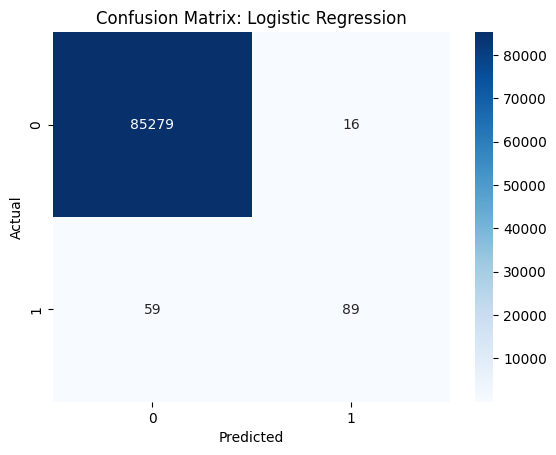

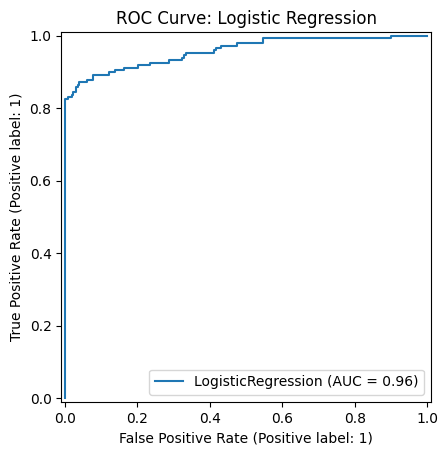


🔹 Decision Tree 🔹
Accuracy : 0.9991807403766253
Precision: 0.7785714285714286
Recall   : 0.7364864864864865
F1-Score : 0.7569444444444444


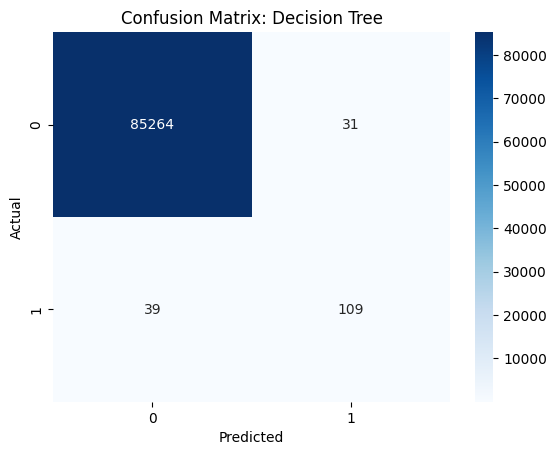

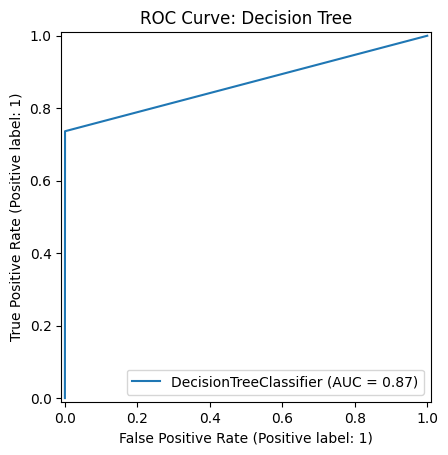


🔹 K-Nearest Neighbors 🔹
Accuracy : 0.9994265182636377
Precision: 0.9159663865546218
Recall   : 0.7364864864864865
F1-Score : 0.8164794007490637


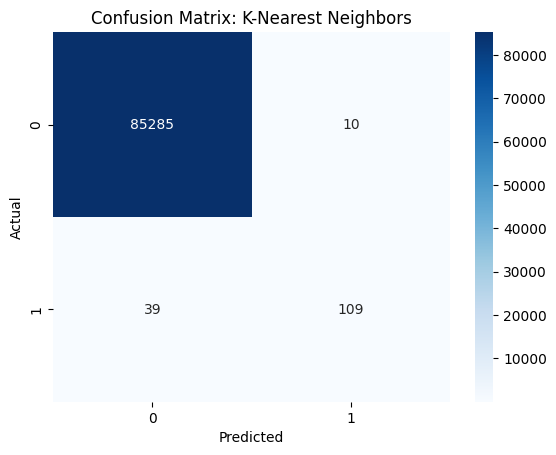

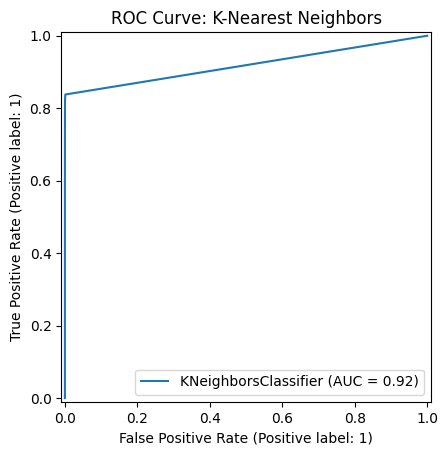


🔹 Random Forest 🔹
Accuracy : 0.9995201479348805
Precision: 0.9572649572649573
Recall   : 0.7567567567567568
F1-Score : 0.8452830188679246


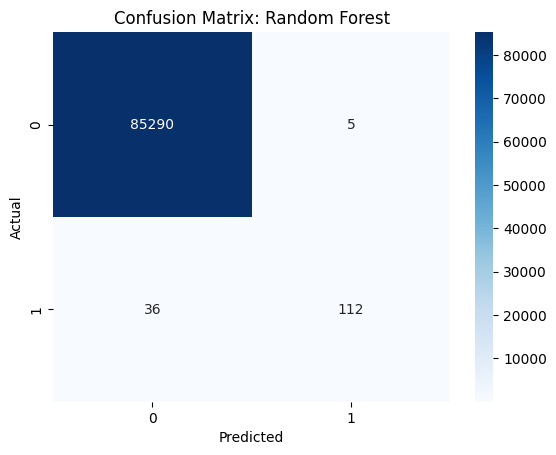

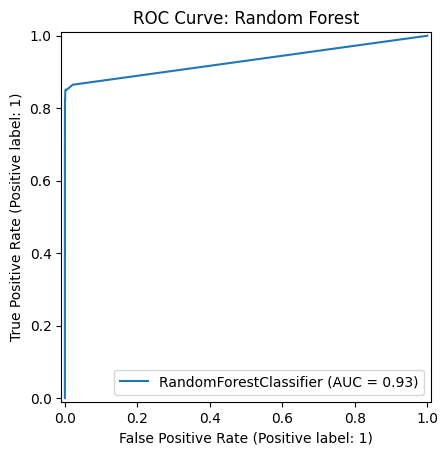


🔹 AdaBoost 🔹
Accuracy : 0.9990988144142879
Precision: 0.7591240875912408
Recall   : 0.7027027027027027
F1-Score : 0.7298245614035088


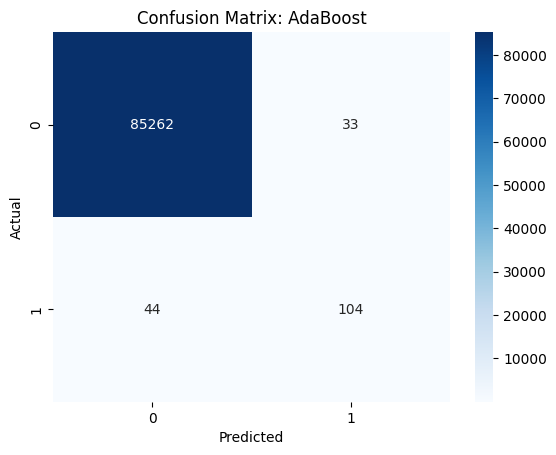

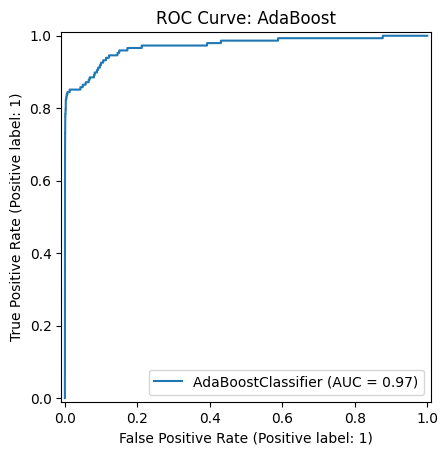


🔹 SVM 🔹
Accuracy : 0.9992860737567735
Precision: 0.967741935483871
Recall   : 0.6081081081081081
F1-Score : 0.7468879668049793


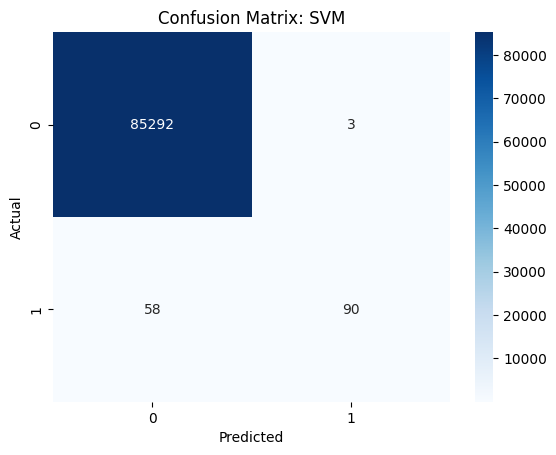

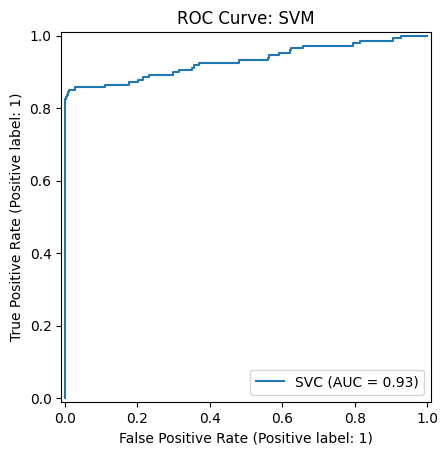

In [15]:
# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_scaled = X_scaled.copy()
df_scaled["Class"] = y

# Split data
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1️⃣ Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 2️⃣ Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 3️⃣ K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 4️⃣ Random Forest (Bagging)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 5️⃣ AdaBoost (Boosting)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# 6️⃣ SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Dictionary untuk looping hasil
models = {
    'Logistic Regression': (y_pred_logreg, logreg),
    'Decision Tree': (y_pred_dt, dt),
    'K-Nearest Neighbors': (y_pred_knn, knn),
    'Random Forest': (y_pred_rf, rf),
    'AdaBoost': (y_pred_ada, ada),
    'SVM': (y_pred_svm, svm)
}

# Evaluasi semua model
for name, (y_pred, model) in models.items():
    print(f"\n🔹 {name} 🔹")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
    print("F1-Score :", f1_score(y_test, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        RocCurveDisplay.from_estimator(model, X_test, y_test)
    else:
        RocCurveDisplay.from_predictions(y_test, y_pred)
    plt.title(f'ROC Curve: {name}')
    plt.show()

#Kesimpulan Matriks Terbaik:
Berdasarkan hasil evaluasi, Random Forest memberikan performa terbaik secara keseluruhan untuk kasus ini, dengan F1-Score tertinggi (0.85) yang menunjukkan keseimbangan optimal antara Precision dan Recall. Meskipun AdaBoost memiliki AUC tertinggi (0.97), F1-Score-nya lebih rendah sehingga kurang balance untuk mendeteksi fraud secara konsisten. Jika fokus lebih ke meminimalkan false positive, SVM layak dipertimbangkan karena memiliki Precision tertinggi (0.97). Namun secara umum, Random Forest adalah model paling optimal untuk mendeteksi credit card fraud pada dataset ini.

#Penjelasan Setiap Model
##1. Logistic Regression
Logistic Regression adalah model klasifikasi linier yang digunakan untuk memprediksi probabilitas suatu data masuk ke dalam kelas tertentu (binary classification). Model ini menggunakan fungsi sigmoid/logistik untuk mengubah output menjadi probabilitas antara 0–1.

Cara Kerja:
- Menghitung kombinasi linier dari fitur:
$$
z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

- Lalu memasukkan hasil ke fungsi sigmoid:
$$
P(y=1)=\frac{1}{1+e^{-z}}
$$

Kelebihan:
- Mudah diinterpretasi
- Cepat dan efisien untuk dataset besar dengan hubungan linier.

Kekurangan:
- Kurang cocok untuk data dengan pola non-linear.
- Kinerjanya menurun jika fitur memiliki multikolinearitas.
<br><br>

##2. Decision Tree
Decision Tree adalah model yang memetakan keputusan dalam bentuk struktur pohon. Setiap node memutuskan pemisahan dataset berdasarkan fitur yang paling informatif, hingga mencapai daun (output kelas).

Cara Kerja:
- Menggunakan algoritma seperti ID3/CART.
- Memilih fitur terbaik berdasarkan kriteria seperti Gini Impurity atau Entropy (Information Gain) untuk memisahkan data.
- Membagi data hingga kriteria berhenti terpenuhi (misalnya semua data di daun adalah kelas yang sama).

Kelebihan:
- Mudah dipahami dan divisualisasikan.
- Dapat menangani hubungan non-linear.
- Tidak memerlukan normalisasi data.

Kekurangan:
- Overfitting jika pohon terlalu dalam.
- Sensitif terhadap perubahan kecil pada data (tidak stabil).
<br><br>

##3. K-Nearest Neighbors (KNN)
KNN adalah algoritma instance-based learning di mana prediksi kelas ditentukan berdasarkan mayoritas label dari K tetangga terdekat di ruang fitur.

Cara Kerja:
- Menghitung jarak (biasanya Euclidean) antara titik data baru dengan semua titik di dataset.
- Memilih K tetangga terdekat.
- Memilih kelas mayoritas dari tetangga tersebut sebagai prediksi.

Kelebihan:
- Sederhana dan intuitif.
- Tidak ada proses training (lazy learning).

Kekurangan:
- Lambat untuk dataset besar.
- Sangat sensitif terhadap skala fitur (perlu normalisasi).
- Bisa lemah di data yang sangat tidak seimbang.
<br><br>

##4. Random Forest
Random Forest adalah algoritma ensemble yang terdiri dari banyak Decision Tree. Setiap pohon dilatih dengan subset data dan subset fitur yang diacak, dan hasil akhirnya adalah rata-rata (regresi) atau voting mayoritas (klasifikasi).

Cara Kerja:
- Bootstrap aggregating (bagging): membuat banyak sample acak dari dataset.
- Setiap pohon dilatih dari data acak + subset acak fitur.
- Voting hasil dari semua pohon untuk memutuskan kelas akhir.

Kelebihan:
- Biasanya menghasilkan performa tinggi.
- Lebih tahan overfitting daripada 1 Decision Tree.
- Menangani data high-dimensional dengan baik.

Kekurangan:
- Waktu training lebih lama.
- Interpretasi lebih sulit daripada Decision Tree tunggal.
<br><br>

##5. AdaBoost (Adaptive Boosting)
AdaBoost adalah teknik boosting yang menggabungkan banyak model lemah (biasanya Decision Stump: Decision Tree 1-level). Model-model ini dilatih secara berurutan, dan masing-masing fokus pada kesalahan dari model sebelumnya.

Cara Kerja:
- Model pertama dilatih.
- Data yang salah diklasifikasikan diberi bobot lebih tinggi.
- Model berikutnya fokus pada data salah tersebut.
- Hasil akhir adalah gabungan model dengan bobot yang menyesuaikan performanya.

Kelebihan:
- Meningkatkan akurasi dari model yang sederhana.
- Bisa menangkap pola kompleks.

Kekurangan:
- Sensitif terhadap outlier dan noise.
- Bisa overfitting jika model lemah terlalu kompleks.
<br><br>

##6. Support Vector Machine (SVM)
SVM mencari hyperplane optimal yang memisahkan kelas dengan margin terbesar. SVM sangat cocok untuk data high-dimensional dan dapat menggunakan kernel trick untuk memetakan data non-linear ke ruang yang lebih tinggi.

Cara Kerja:
- Mencari garis/pesawat (hyperplane) yang memisahkan dua kelas dengan margin terbesar.
- Jika data tidak linear, gunakan kernel (contoh: RBF, Polynomial) untuk memetakan ke ruang dimensi lebih tinggi.

Kelebihan:
- Kuat untuk data dengan dimensi tinggi.
- Akurat terutama jika data clean dan well-structured.

Kekurangan:
- Konsumsi memori tinggi untuk dataset besar.
- Parameter (C, gamma) harus di-tune dengan hati-hati.


